<a href="https://colab.research.google.com/github/EkeneFidel/Travel-Insurance-Claim-Prediction/blob/main/Datathon_1_Travel_Insurance_Claim_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

In [ ]:
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )

In [ ]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                48260 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [ ]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


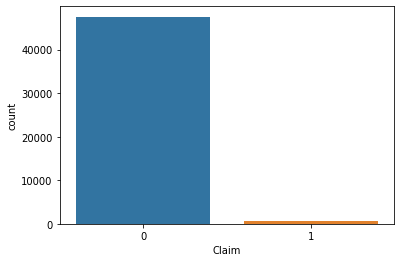

In [ ]:
sns.countplot(insurance_data['Claim'])

In [ ]:
insurance_data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [ ]:
insurance_data['Gender']=insurance_data['Gender'].fillna("Not Specified")

In [ ]:
updated_insurance_data = insurance_data.drop(columns = [ 'Distribution Channel','Destination','Agency Type'])

In [ ]:
updated_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Product Name          48260 non-null  object 
 2   Duration              48260 non-null  int64  
 3   Net Sales             48260 non-null  float64
 4   Commision (in value)  48260 non-null  float64
 5   Gender                48260 non-null  object 
 6   Age                   48260 non-null  int64  
 7   Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.9+ MB


In [ ]:
updated_insurance_data = pd.get_dummies(data=updated_insurance_data, columns=[ 'Agency', 'Gender', 'Product Name'])
updated_insurance_data.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Gender_F,Gender_M,Gender_Not Specified,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = updated_insurance_data.drop("Claim", axis = 1)
y = updated_insurance_data["Claim"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=25, sampling_strategy = 1.0)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression 

lrt = LogisticRegression().fit(X_smote_train, y_smote_train)
y_lr_pred = lrt.predict(X_test)

In [ ]:
print("Train Accuracy:",lrt.score(X_smote_train, y_smote_train))
print("Test Accuracy:",lrt.score(X_test, y_test))

Train Accuracy: 0.7657128257537047
Test Accuracy: 0.824906755076668


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_smote_train, lrt.predict(X_smote_train)))

0.7509306747191998


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_lr_pred))

0.09107206884187881


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1).fit(X_smote_train, y_smote_train)
y_dtc_pred = dtc.predict(X_test)

In [ ]:
print("Train Accuracy:",dtc.score(X_smote_train, y_smote_train))
print("Test Accuracy:",dtc.score(X_test, y_test))

Train Accuracy: 0.9986774474736241
Test Accuracy: 0.9634618041165907


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_smote_train, dtc.predict(X_smote_train)))
print(f1_score(y_test, y_dtc_pred))

0.998675855427488
0.0670194003527337


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1).fit(X_smote_train, y_smote_train)
y_rfc_pred = rfc.predict(X_test)

In [ ]:
print("Train Accuracy:",rfc.score(X_smote_train, y_smote_train))
print("Test Accuracy:",rfc.score(X_test, y_test))

print(f1_score(y_smote_train, rfc.predict(X_smote_train)))
print(f1_score(y_test, y_rfc_pred))

Train Accuracy: 0.9986774474736241
Test Accuracy: 0.9732697886448405
0.9986766121270453
0.06746987951807228


In [ ]:
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, average='micro')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [True],'max_depth': [10, 20],'min_samples_leaf': [3, 4], 'min_samples_split': [4, 6], 'n_estimators': [100, 200]}
]

forest_reg = RandomForestClassifier(random_state=1)
grid_search_1 = GridSearchCV(forest_reg, param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring=f1_scorer,
                          return_train_score=True)
grid_search_1.fit(X_smote_train, y_smote_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
param_grid = [
    {'max_leaf_nodes': [5, 10, 15, 20],'min_samples_split': [4, 6, 8, 10]}
]

d_tree = DecisionTreeClassifier(random_state=1)
grid_search_2 = GridSearchCV(d_tree, param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring=f1_scorer,
                          return_train_score=True)
grid_search_2.fit(X_smote_train, y_smote_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_leaf_nodes': [5, 10, 15, 20],
                          'min_samples_split': [4, 6, 8, 10]}],
    

In [ ]:
grid_search_1.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
grid_search_2.best_params_

{'max_leaf_nodes': 20, 'min_samples_split': 4}

In [ ]:
y_grd1_pred = grid_search_1.predict(X_test)

In [ ]:
y_grd2_pred = grid_search_2.predict(X_test)

In [ ]:
print(f1_score(y_test, y_grd1_pred))

0.08378870673952642


In [ ]:
print(f1_score(y_test, y_grd2_pred))

0.11510791366906475


In [ ]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(random_state=1)
rfe = RFE(estimator=model, step=1).fit(X_smote_train, y_smote_train)

In [ ]:
rfe.get_support().sum()

24

In [ ]:
rfe.ranking_

array([ 1,  1,  1,  1, 22, 13,  1, 24, 15, 23,  1,  1,  5,  1,  8,  1, 16,
        2,  7, 14,  1,  1,  1,  1,  1, 20, 10,  1,  3, 21, 11,  1,  1,  1,
       25,  6,  1, 18, 17,  1,  1,  1,  1,  9, 19,  4, 12, 26,  1])

In [ ]:
from operator import itemgetter
for x, y in (sorted(zip(rfe.ranking_ , X_train.columns), key=itemgetter(0))):
    print(x, y)

1 Duration
1 Net Sales
1 Commision (in value)
1 Age
1 Agency_C2B
1 Agency_CWT
1 Agency_EPX
1 Agency_JZI
1 Agency_LWC
1 Gender_F
1 Gender_M
1 Gender_Not Specified
1 Product Name_1 way Comprehensive Plan
1 Product Name_2 way Comprehensive Plan
1 Product Name_Annual Silver Plan
1 Product Name_Basic Plan
1 Product Name_Bronze Plan
1 Product Name_Cancellation Plan
1 Product Name_Gold Plan
1 Product Name_Rental Vehicle Excess Insurance
1 Product Name_Silver Plan
1 Product Name_Single Trip Travel Protect Gold
1 Product Name_Single Trip Travel Protect Platinum
1 Product Name_Value Plan
2 Agency_SSI
3 Product Name_Annual Travel Protect Gold
4 Product Name_Ticket Protector
5 Agency_JWT
6 Product Name_Comprehensive Plan
7 Agency_TST
8 Agency_KML
9 Product Name_Single Trip Travel Protect Silver
10 Product Name_Annual Gold Plan
11 Product Name_Annual Travel Protect Silver
12 Product Name_Travel Cruise Protect
13 Agency_ART
14 Agency_TTW
15 Agency_CCR
16 Agency_RAB
17 Product Name_Premier Plan
18 Pr

In [ ]:
n_features_to_select = rfe.get_support().sum()
rfe = RFE(model, n_features_to_select)
rfe.fit(X_smote_train, y_smote_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=1, verbose=0,
                                     warm_start=False),
    n_features_to_select=24, step=1, verbose=0)

In [ ]:
y_rfe_predict = rfe.predict(X_test)

In [ ]:
print("Train Accuracy:",rfe.score(X_smote_train, y_smote_train))
print("Test Accuracy:",rfe.score(X_test, y_test))

print(f1_score(y_smote_train, rfe.predict(X_smote_train)))
print(f1_score(y_test, y_rfe_predict))

Train Accuracy: 0.9986774474736241
Test Accuracy: 0.973753280839895
0.9986764130794453
0.06403940886699507
